<a href="https://colab.research.google.com/github/Sriharish19/Mobile_price_classification_ml_model/blob/main/SH_Mobile_price_range_classification_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix




import math

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the file
df = pd.read_csv('/content/drive/MyDrive/Capstone_mobile_price_range/Copy of data_mobile_price_range.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Capstone_mobile_price_range/Copy of data_mobile_price_range.csv')

In [4]:
#Shape
df.shape

(2000, 21)

In [5]:
# first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# bottom 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
# Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# Info
df.info()
# no non-null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [11]:
# Checking the number of observations having screen width value as 0.
(df['sc_w'].values == 0).sum()

180

In [12]:
# Checking the number of observations having px_height value as 0.
(df['px_height'].values == 0).sum()

2

In [13]:
# As there are only 2 observations having px_height=0. so we will drop it.
df.drop(df[df['px_height'] == 0].index, inplace = True)

In [14]:
# Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
# Numerical variables
df.describe().columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [17]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [18]:
# Checking shape
df.shape

(1998, 21)

In [19]:
# target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

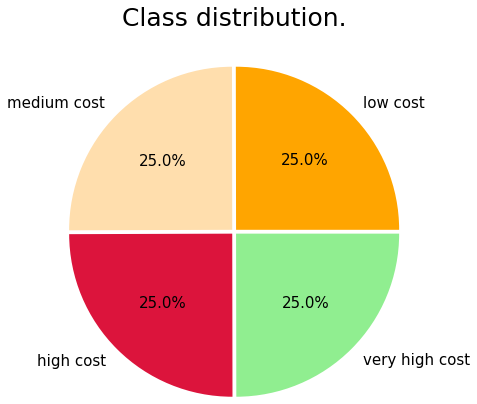

In [20]:
import matplotlib.colors as mcolors
# Plotting the pie chart
plt.figure(figsize = (5,5))
plt.pie(price_range_values , labels = ["low cost", "medium cost", "high cost", "very high cost"],
        explode = [0.025,0.025,0.025,0.025], 
        colors = ['orange','navajowhite','crimson','lightgreen'], 
        radius = 1.5, textprops = {'fontsize': 15}, autopct = '%0.1f%%' )
plt.title('Class distribution.', fontsize = 25, pad=70)
plt.show()

In [21]:
columns=df.columns

In [22]:
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

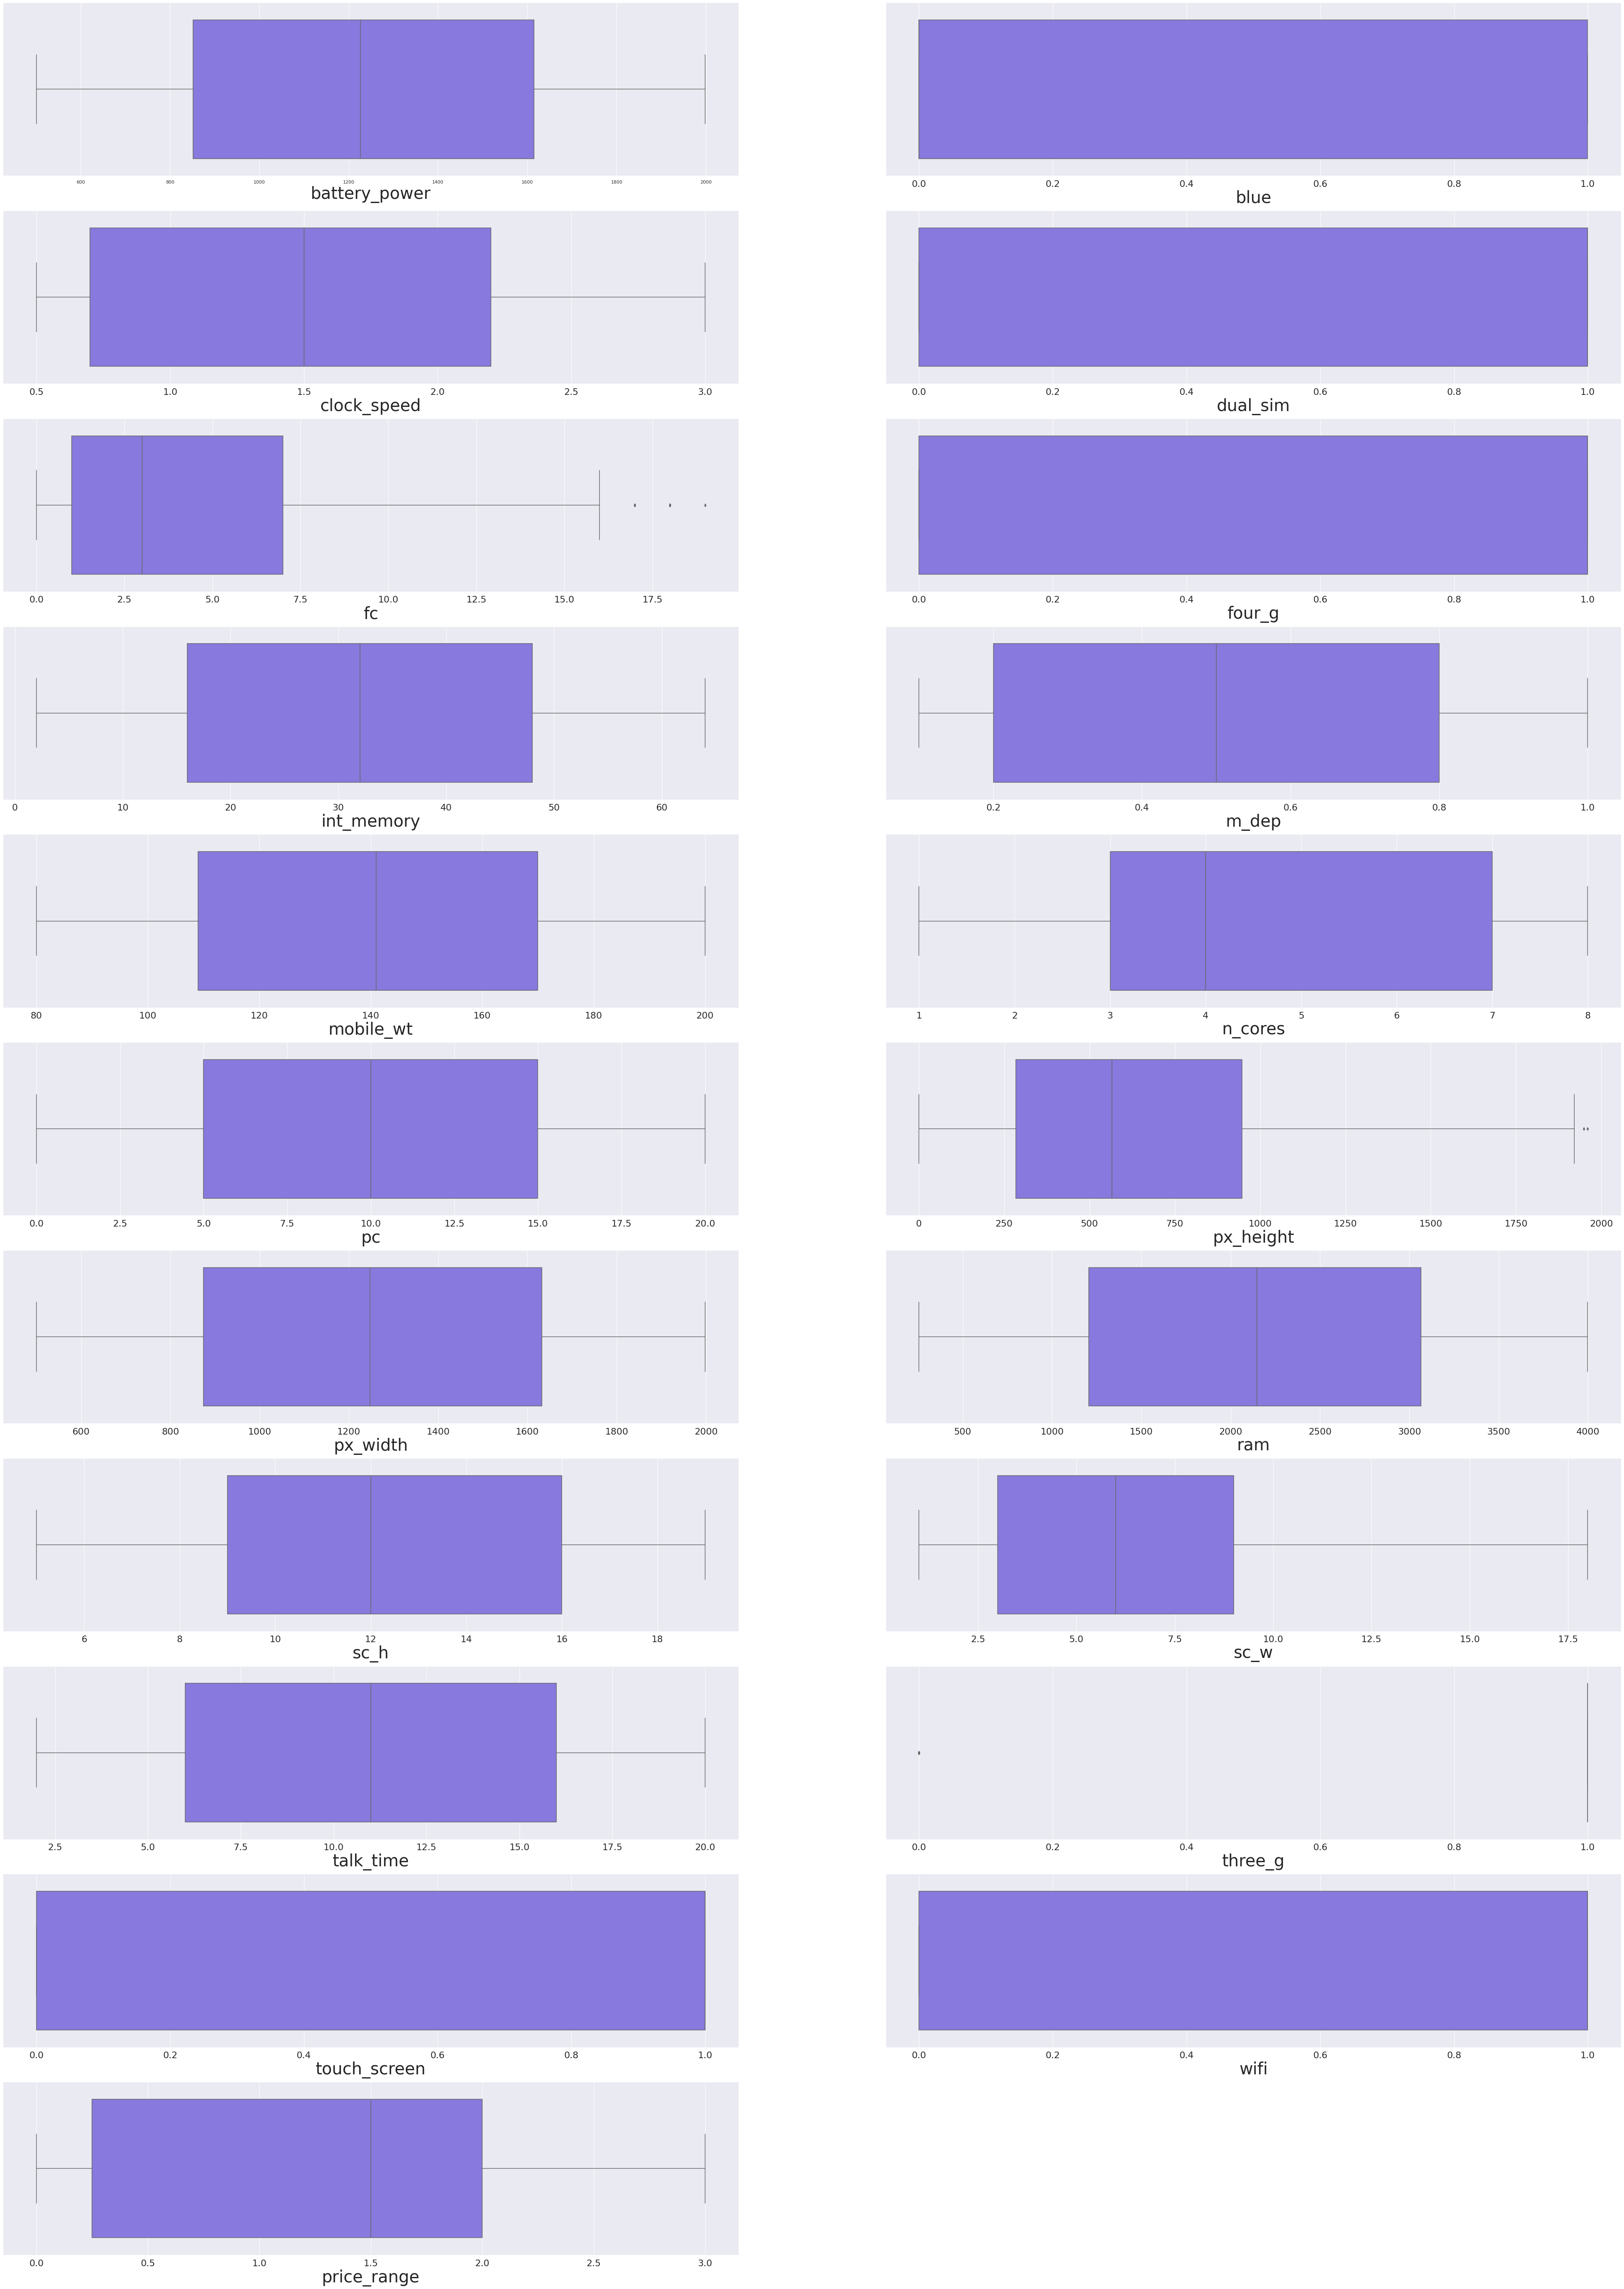

In [ ]:
# Box plot to detect outliers

# lst_box = columns
# plt.figure(figsize = (70,100))
# sns.set_theme()
# for i in enumerate(lst_box):
#     plt.subplot(11, 2,i[0]+1)
#     sns.set(font_scale = 2)
#     sns.boxplot(df[i[1]],color='mediumslateblue')
#     plt.xlabel(i[1],fontsize=40)

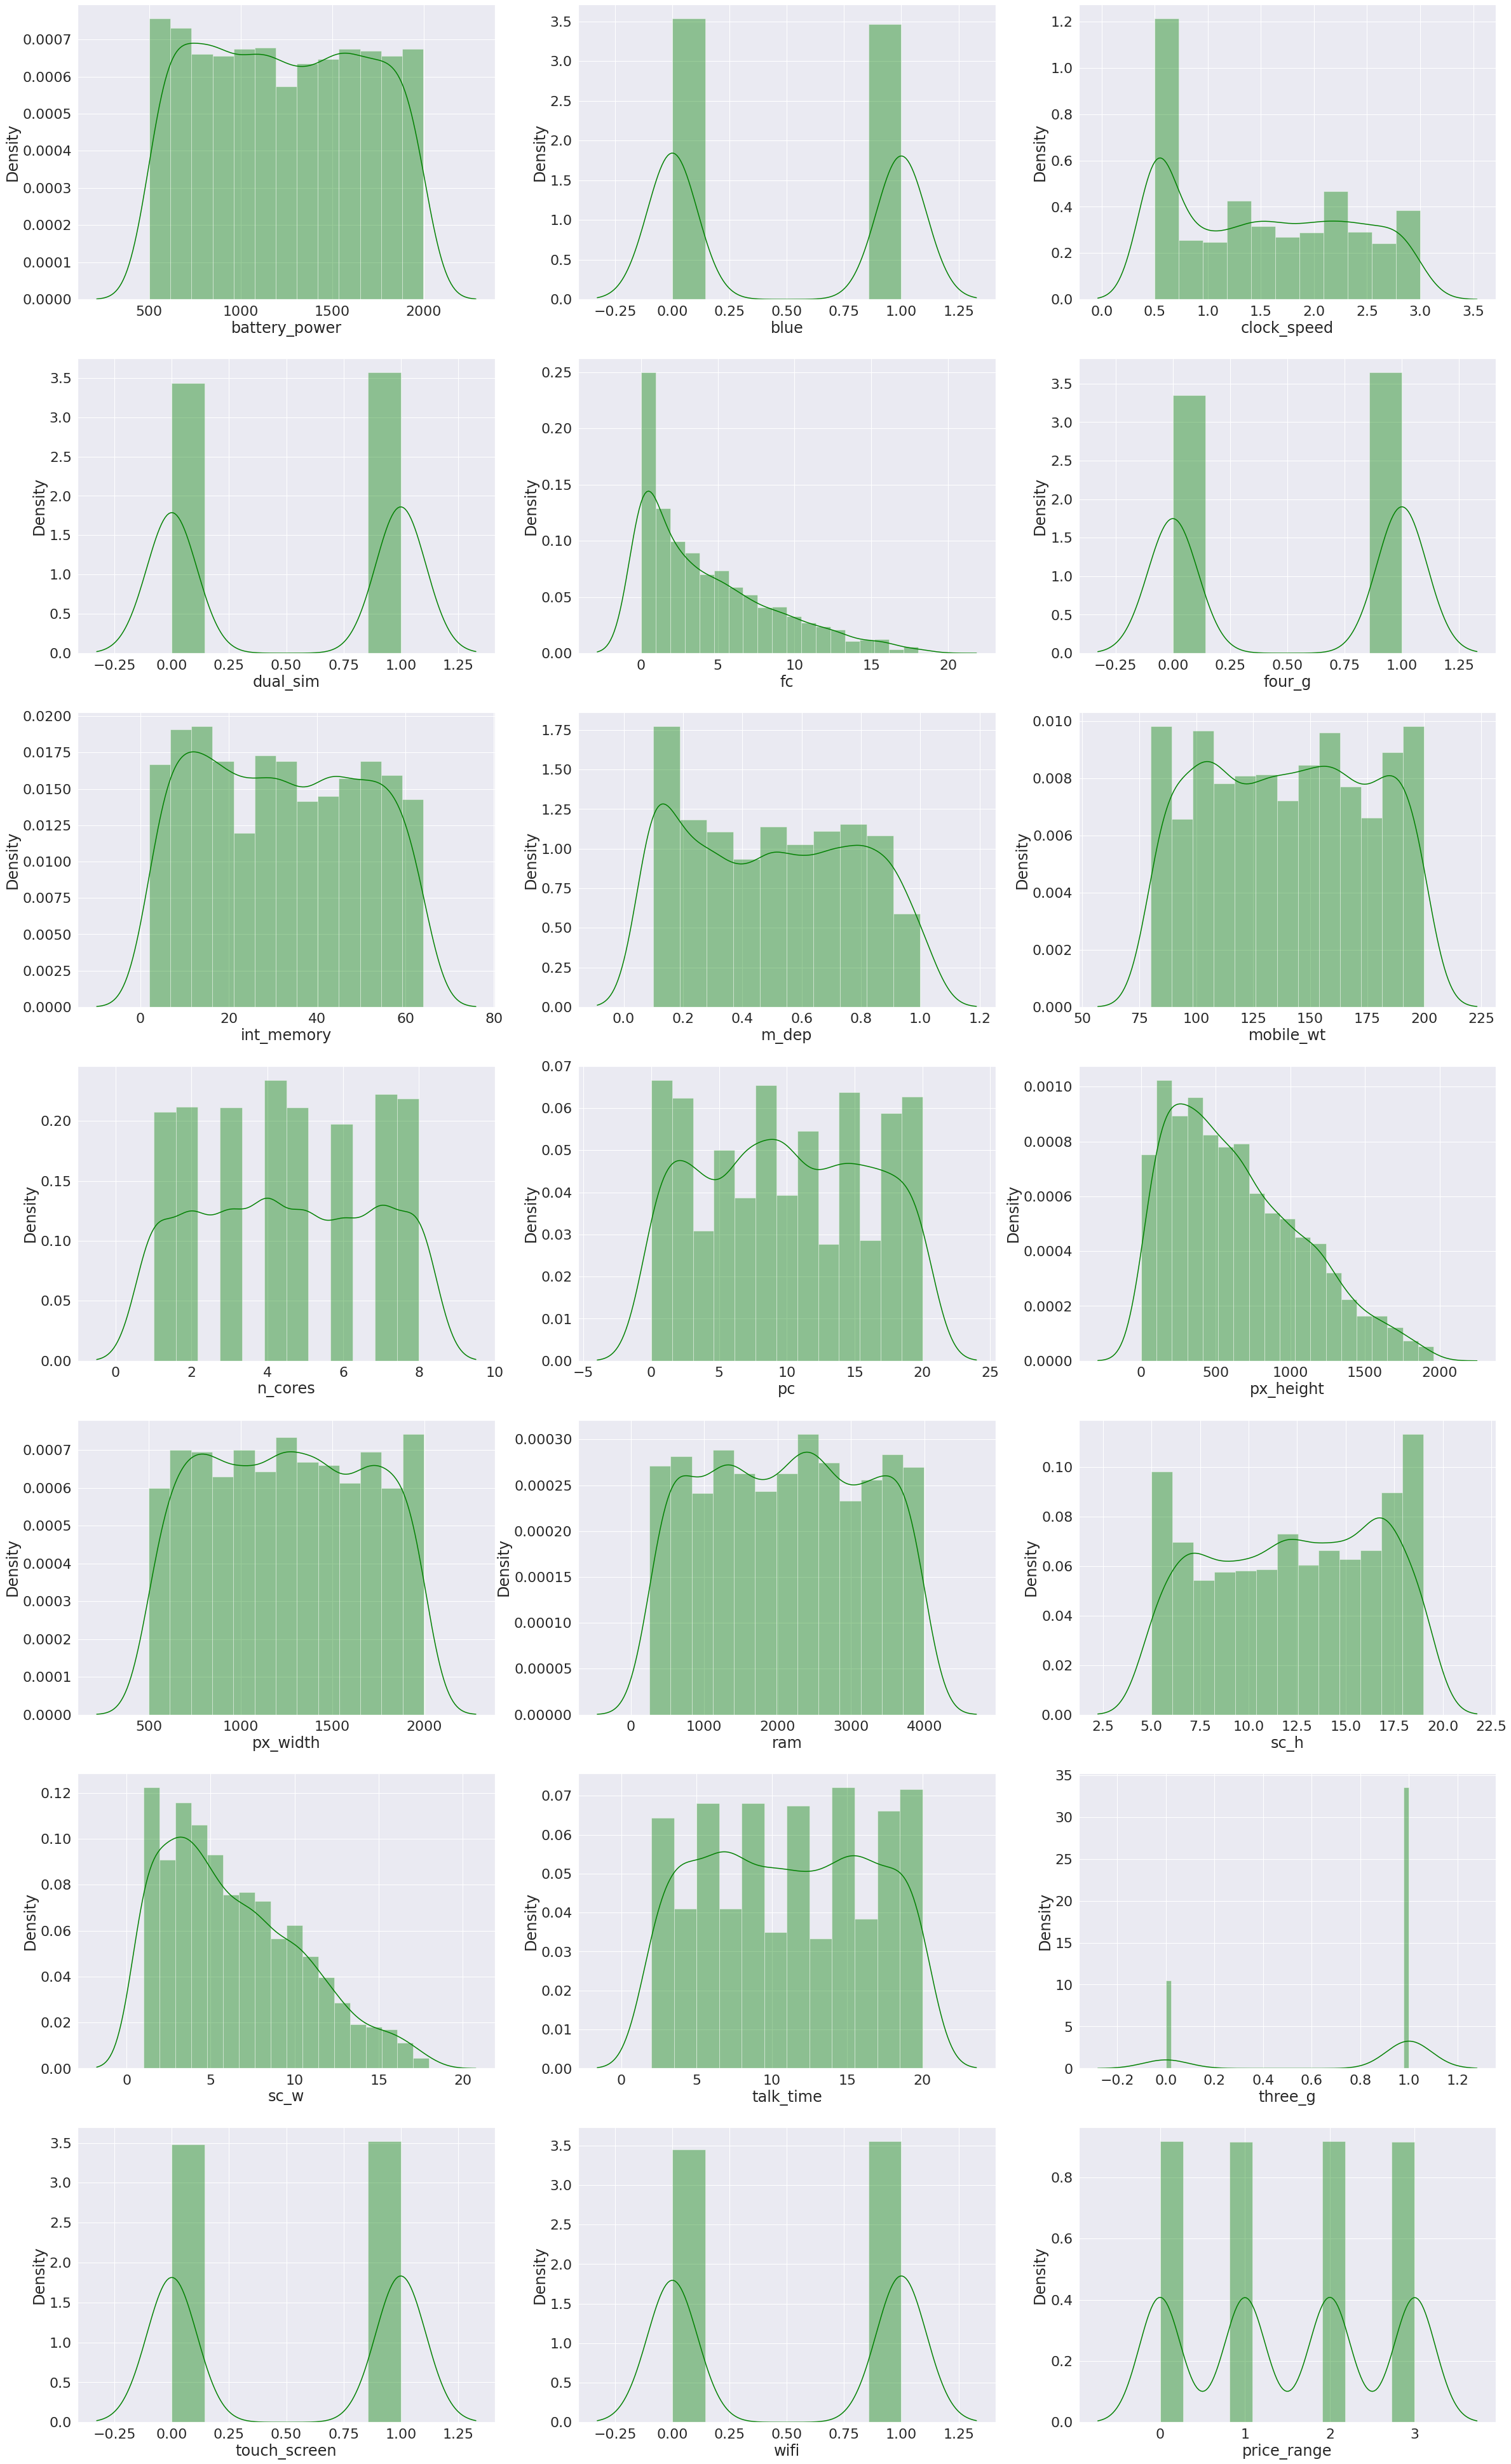

In [ ]:
# Distribution plot for numerical variables

# lst_dist = columns
# plt.figure(figsize = (40,70))
# sns.set_theme()
# for i in enumerate(lst_dist):
#   sns.set(font_scale = 2)
#   plt.subplot(7, 3,i[0]+1)
#   sns.distplot(df[i[1]],color = 'green')

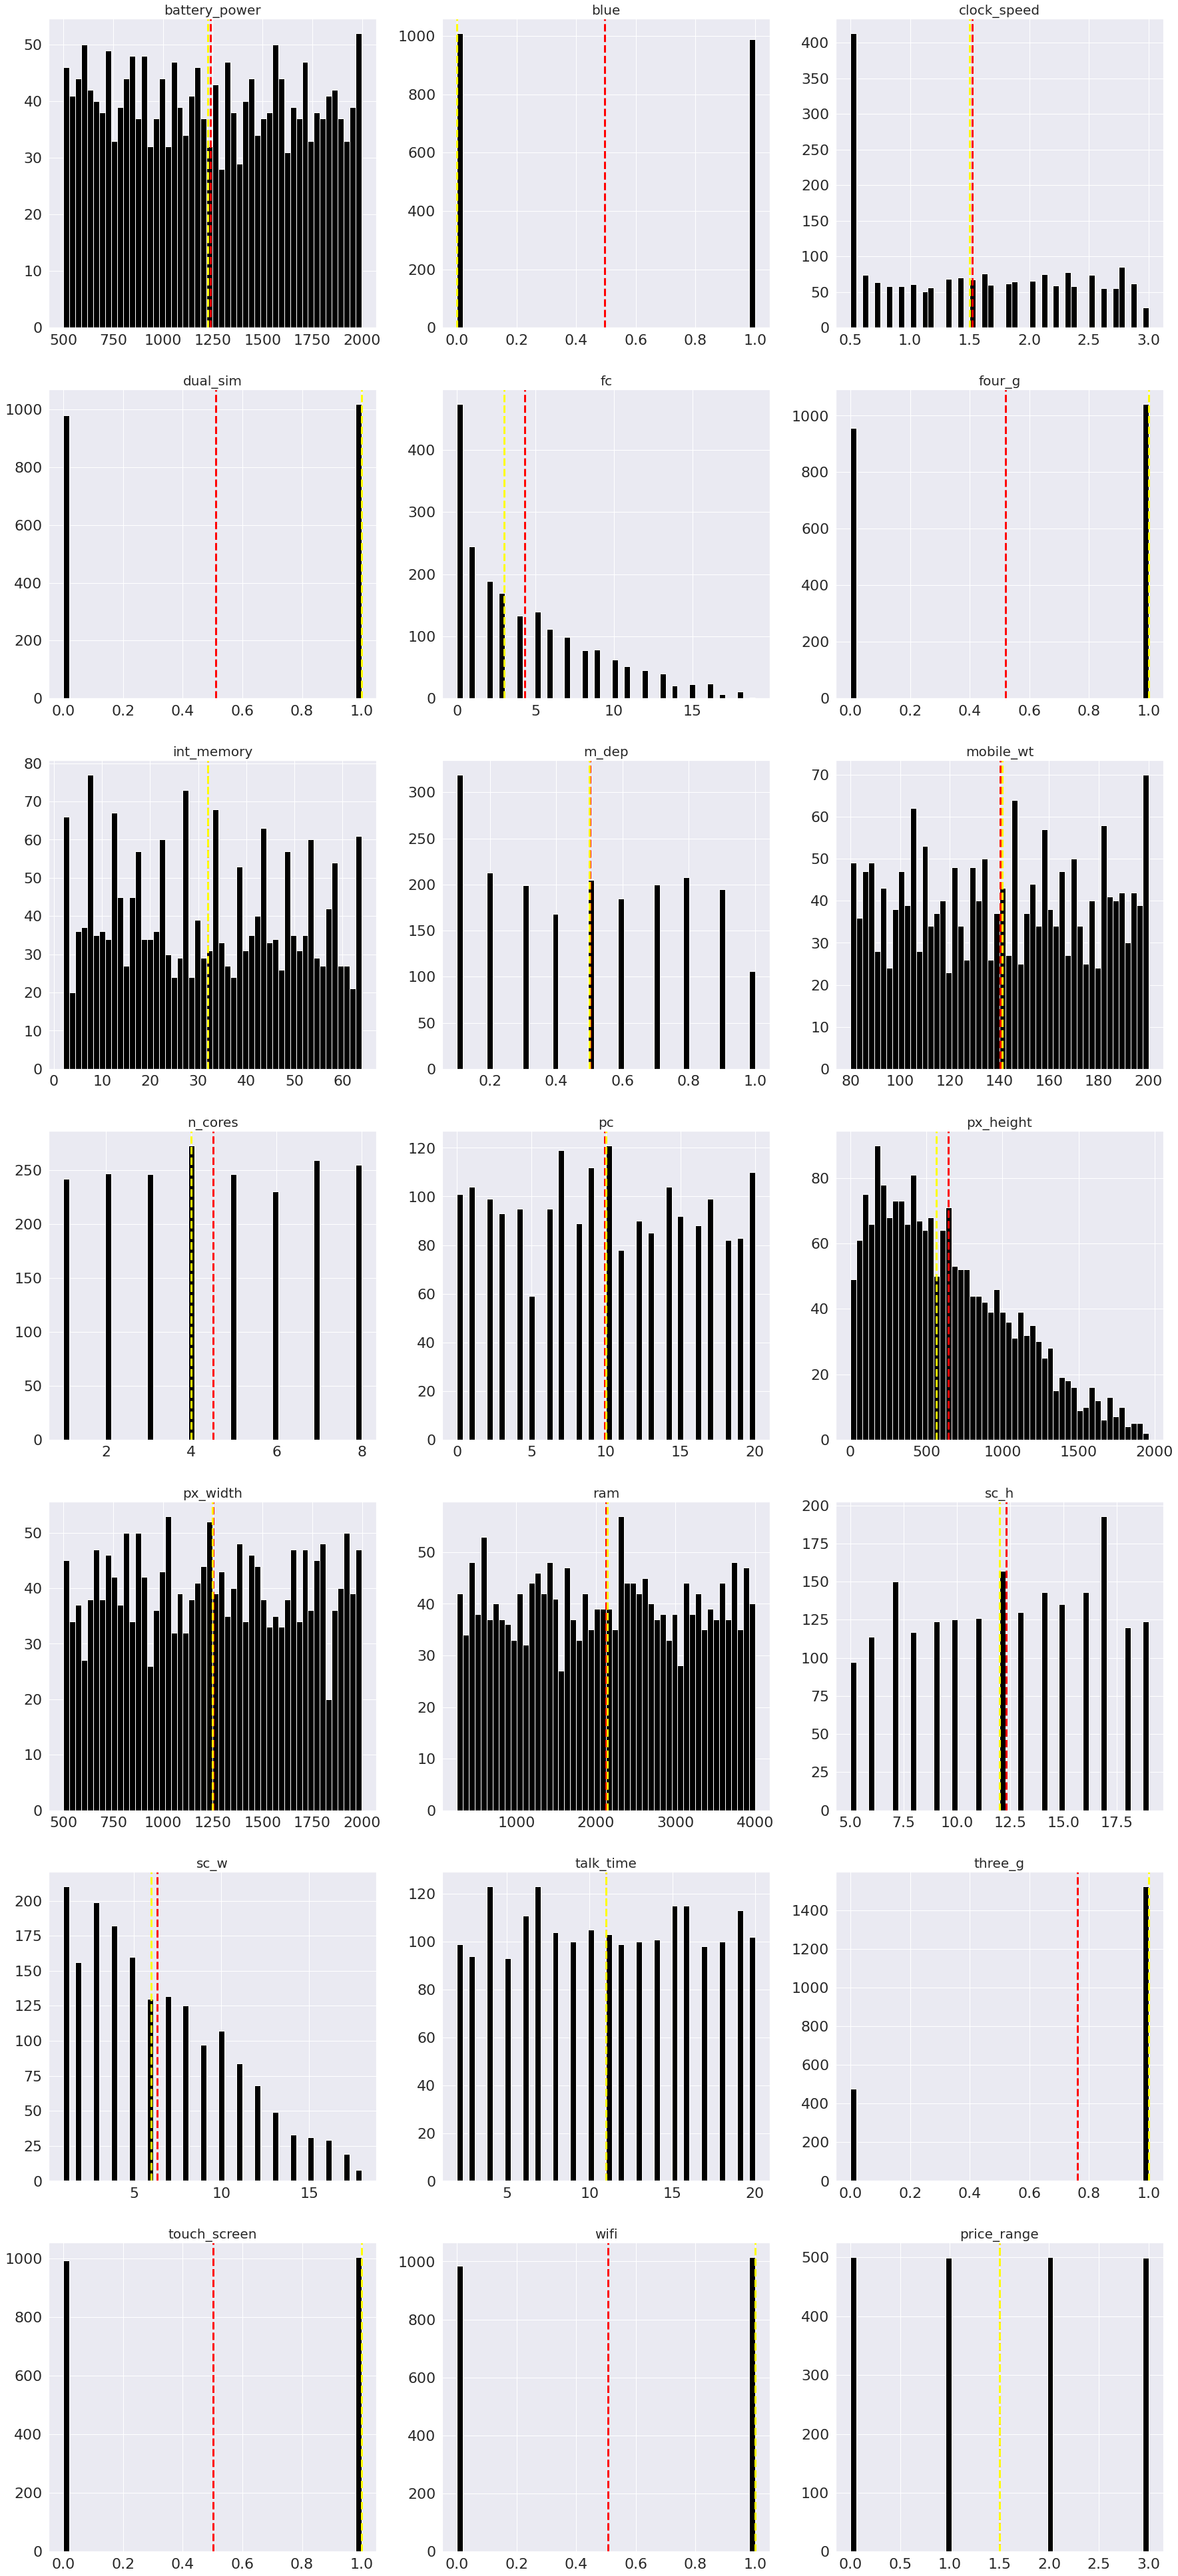

In [ ]:
# Calculating mean and median

# numerical_variables.remove('Hour')

# plt.figure(figsize = (30,70))

# for i in enumerate(columns):
#   plt.subplot(7, 3,i[0]+1)
#   feature = df[i[1]]
#   feature.hist(bins=50,color = 'black')
#   plt.axvline(feature.mean(),color = 'red',linestyle='dashed', linewidth=3)
#   plt.axvline(feature.median(),color = 'yellow',linestyle='dashed',linewidth=3)
#   plt.title(i[1],fontsize = 20)

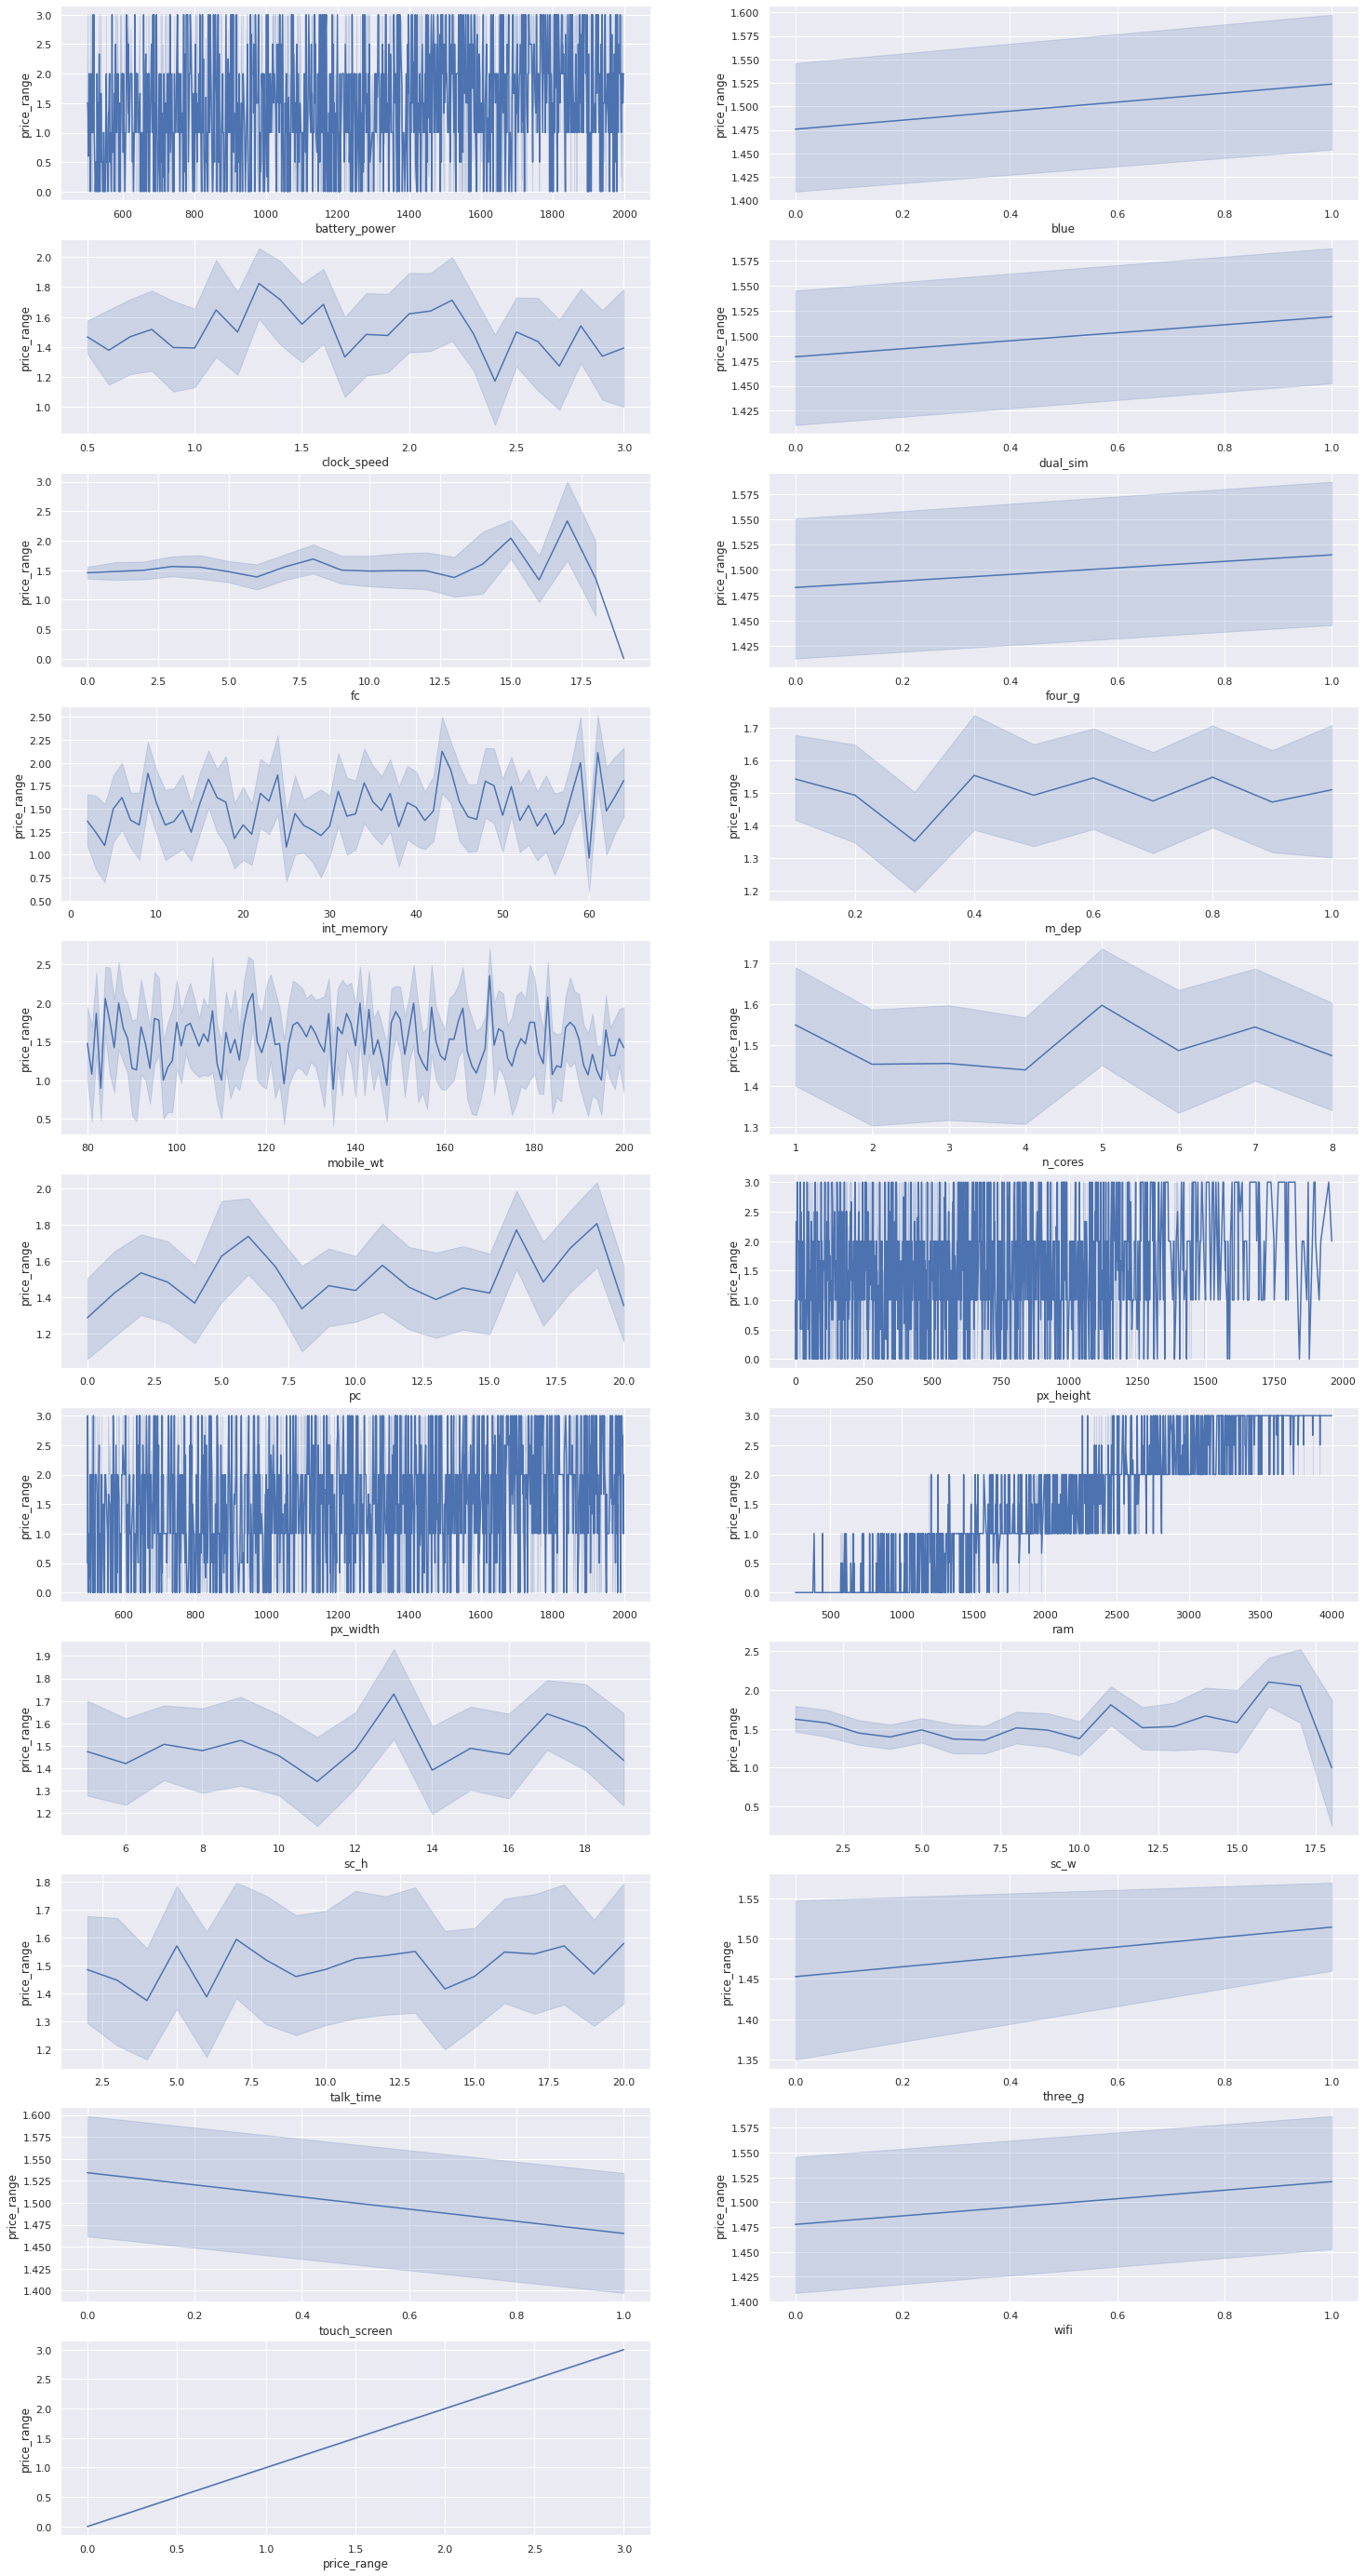

In [ ]:
# line plot for numerical variables

# sns.set_theme(style="darkgrid")
# plt.figure(figsize = (25, 50))
# for i in enumerate(columns):
#   plt.subplot(11,2,i[0]+1)
#   sns.lineplot(x=df[i[1]],y='price_range',data=df,palette='Grouped')

Text(0.5, 1.0, 'Feature Multicolinearity MAP')

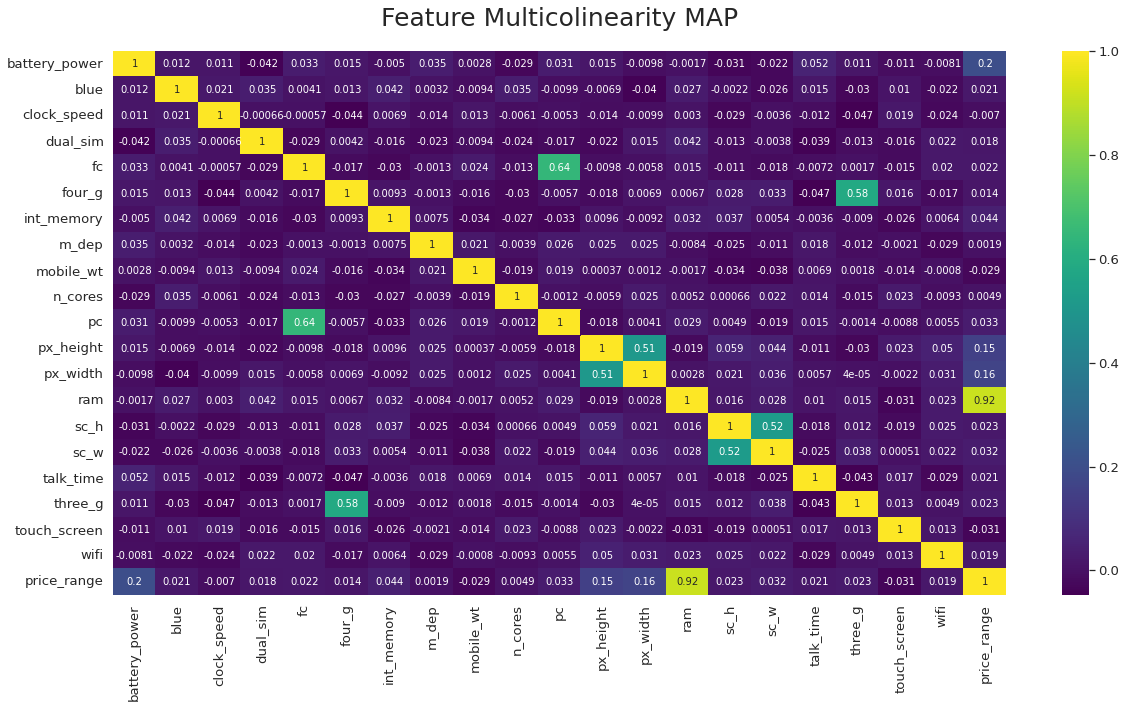

In [ ]:
#Multicolinearity

# corr= df.corr()
# plt.figure(figsize=(20,10))
# sns.set(font_scale=1.2)
# sns.heatmap(corr,annot=True, cmap='viridis',annot_kws={"size": 10})
# plt.title('Feature Multicolinearity MAP', fontsize = 25, pad=25)

In [23]:
bvc=df.loc[:,['blue','dual_sim','four_g','three_g','wifi','touch_screen']]

In [24]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

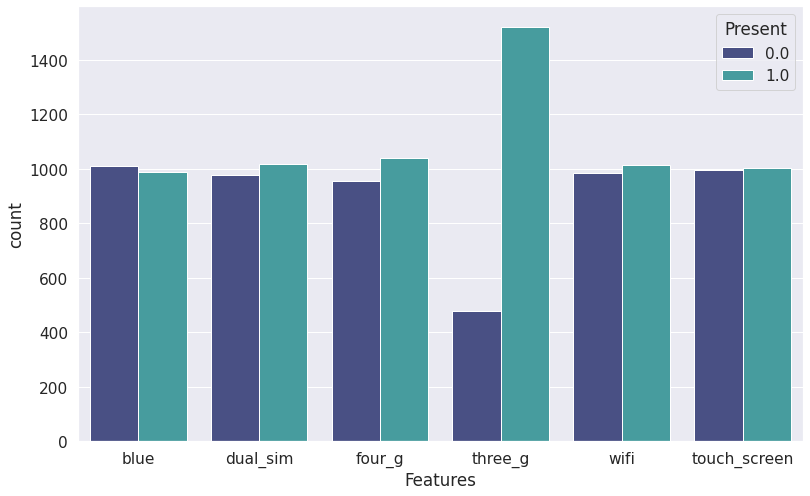

In [25]:
# Countplot for binary categorical variables.

dd = bvc.melt(var_name='Features', value_name='Present')
plt.figure(figsize= (13,8))
sns.set(font_scale=1.4)
sns.countplot(x='Features', hue='Present', data=dd,palette='mako')
plt.show()

In [26]:
# creating a list of categorical independant variables
catv=['blue','dual_sim','four_g','three_g','wifi','touch_screen']

In [27]:
nuv=df.columns.to_list()


In [28]:
rr=['blue','dual_sim','four_g','three_g','wifi','touch_screen','price_range']

In [29]:
for i in rr:
  nuv.remove(i)

In [30]:
# list of numeric independant variables
nv=nuv
nv

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

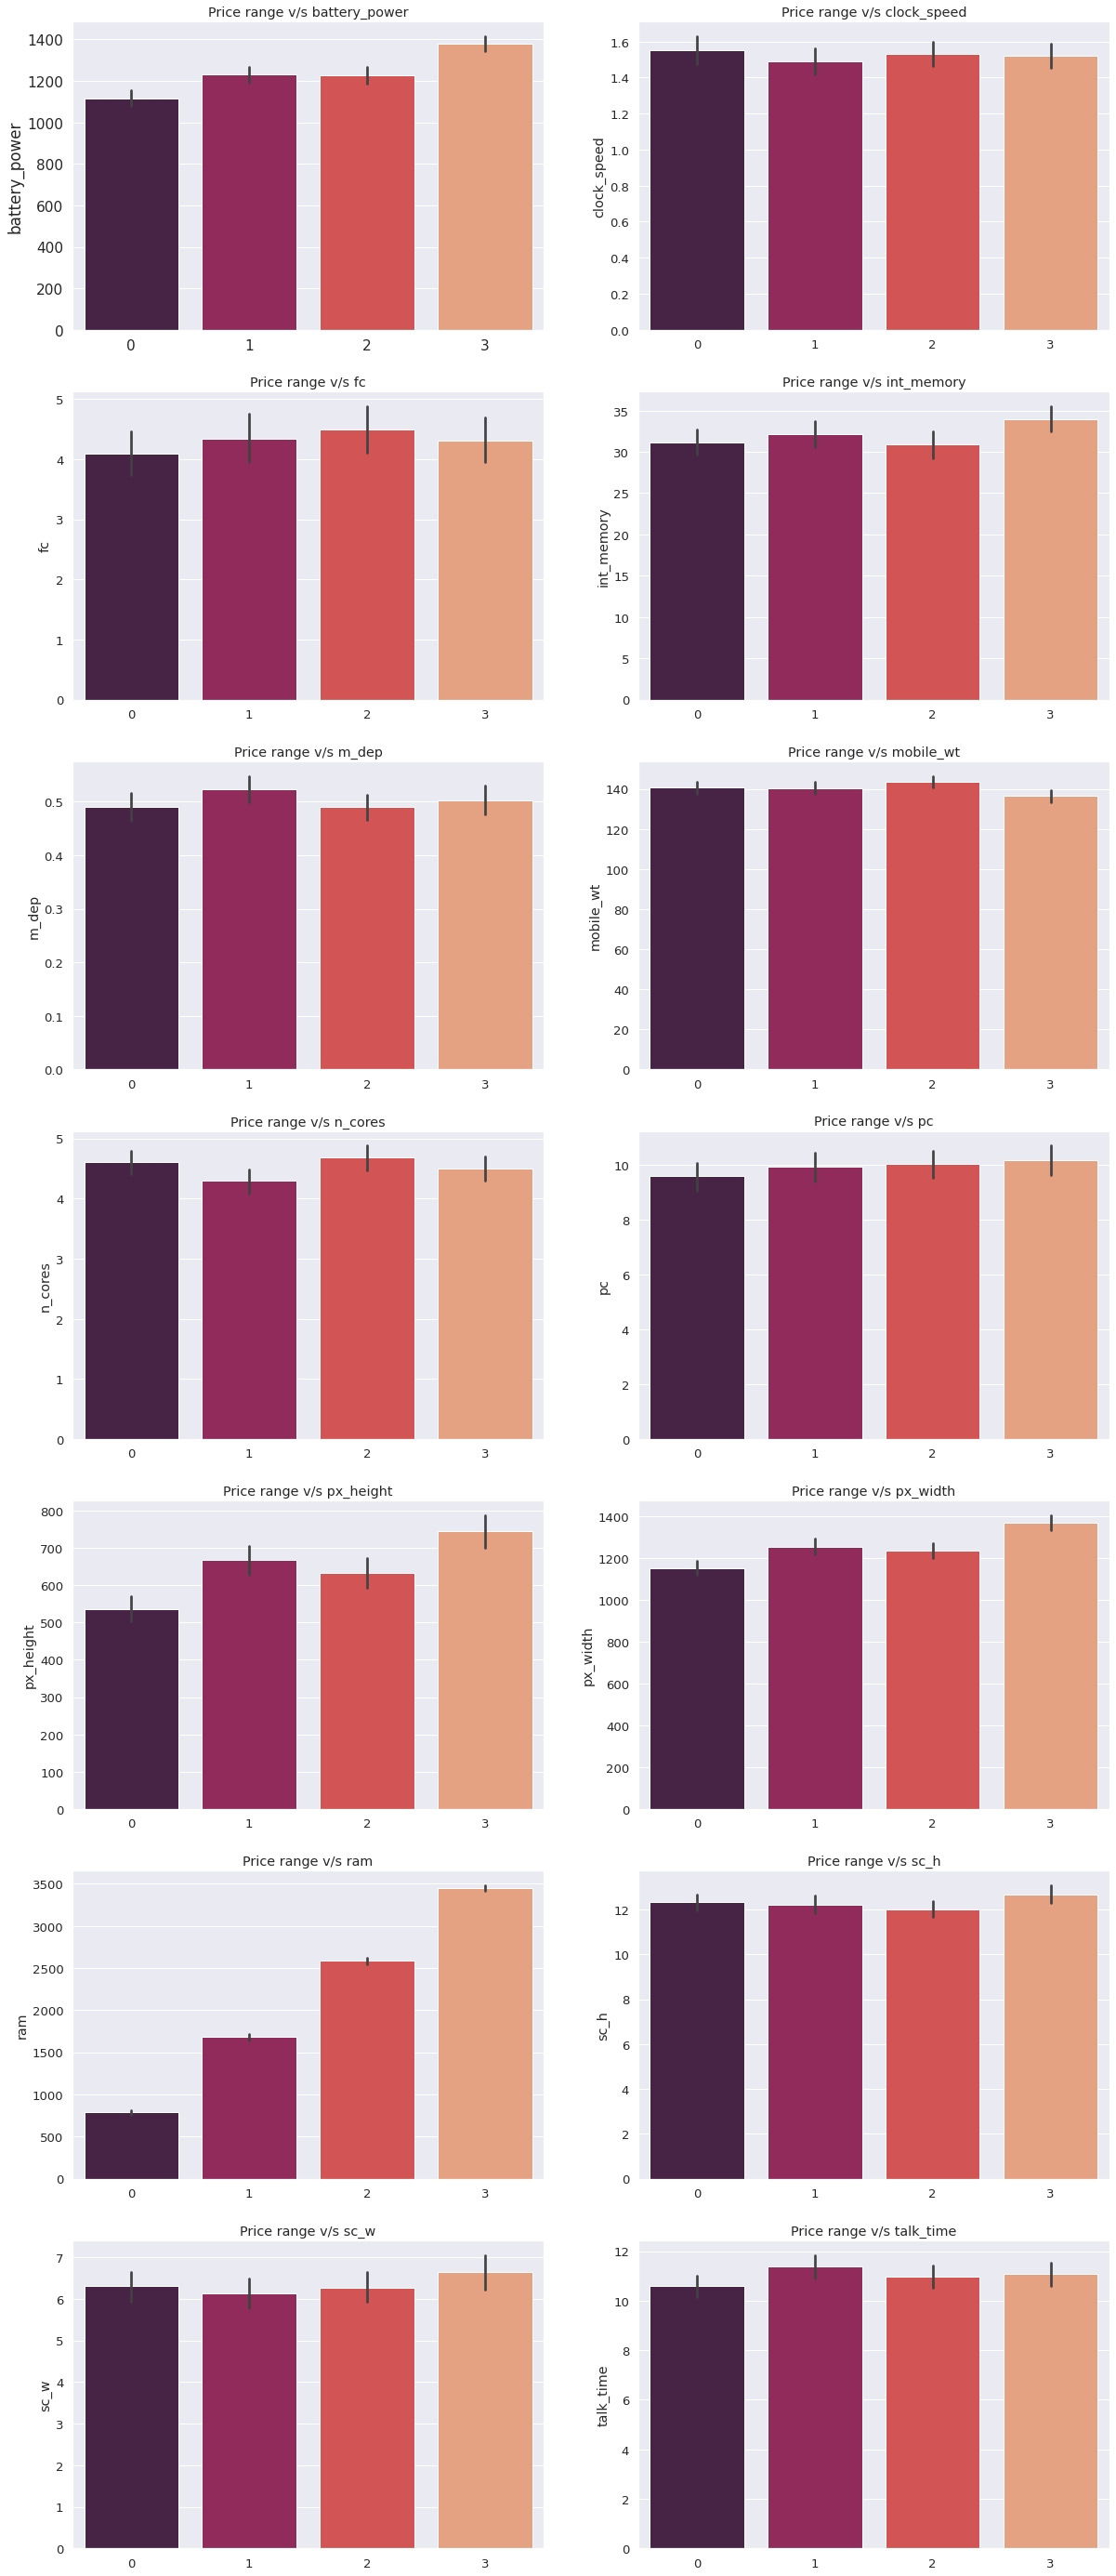

In [ ]:
# plotting  price_range vs other fearures

# plt.figure(figsize=(20,50))
# counter=1
# for i in nv:
#   plt.subplot(7,2,counter)
#   sns.set(font_scale=1.2)
#   sns.barplot(x=df['price_range'],y=df[i], palette="rocket").set(xlabel=None)
#   plt.title(f'Price range v/s {i}')
#   counter=counter+1

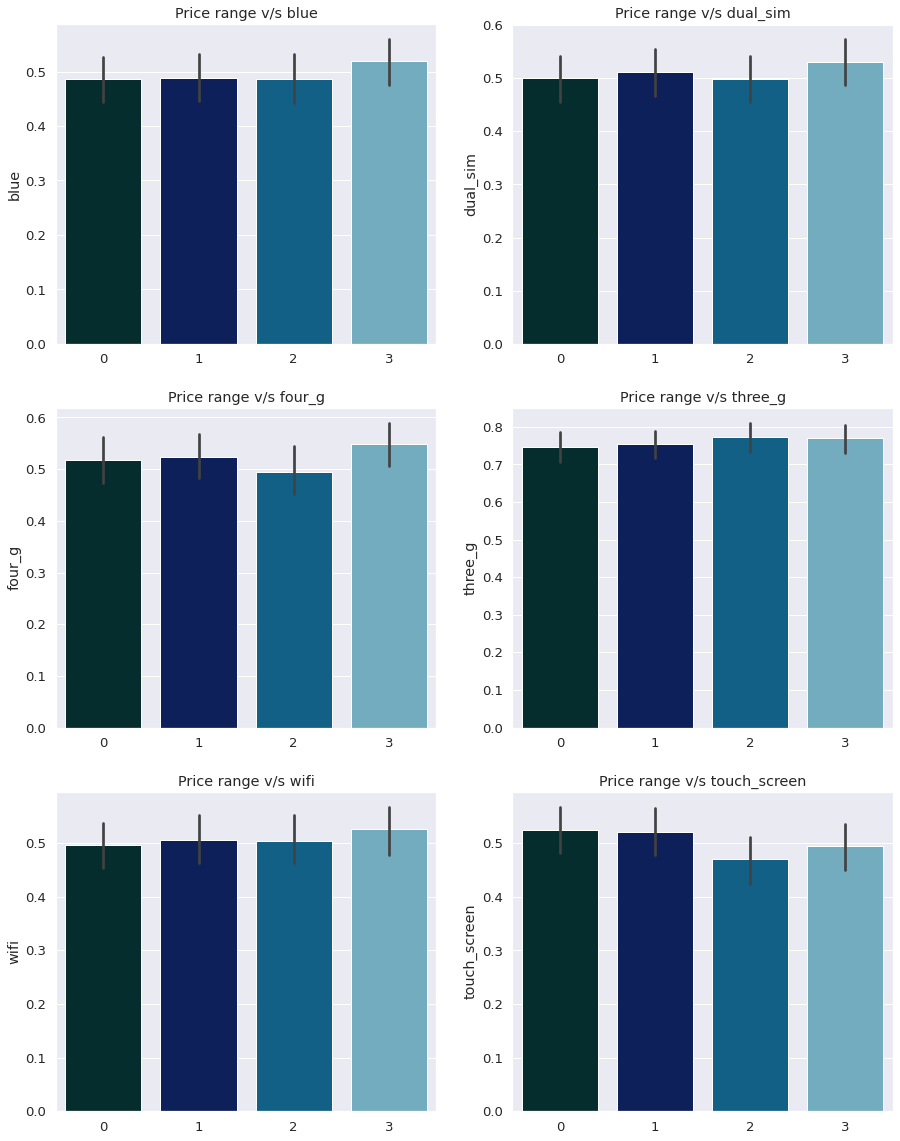

In [ ]:
# plotting  price_range vs other fearures

# plt.figure(figsize=(15,20))
# counter=1
# for i in catv:
#   plt.subplot(3,2,counter)
#   sns.set(font_scale=1.2)
#   sns.barplot(x=df['price_range'],y=df[i], palette="ocean").set(xlabel=None)
#   plt.title(f'Price range v/s {i}')
#   counter=counter+1

In [31]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()


In [32]:
group_by_price

blue      dual_sim      four_g      three_g      touch_screen  \
             0.0  1.0      0.0  1.0    0.0  1.0     0.0  1.0          0.0   
price_range                                                                 
0.0          257  243      250  250    241  259     127  373          238   
1.0          255  244      244  255    238  261     122  377          239   
2.0          257  243      251  249    253  247     113  387          265   
3.0          240  259      234  265    225  274     115  384          252   

                 wifi       
             1.0  0.0  1.0  
price_range                 
0.0          262  252  248  
1.0          260  247  252  
2.0          235  248  252  
3.0          247  237  262

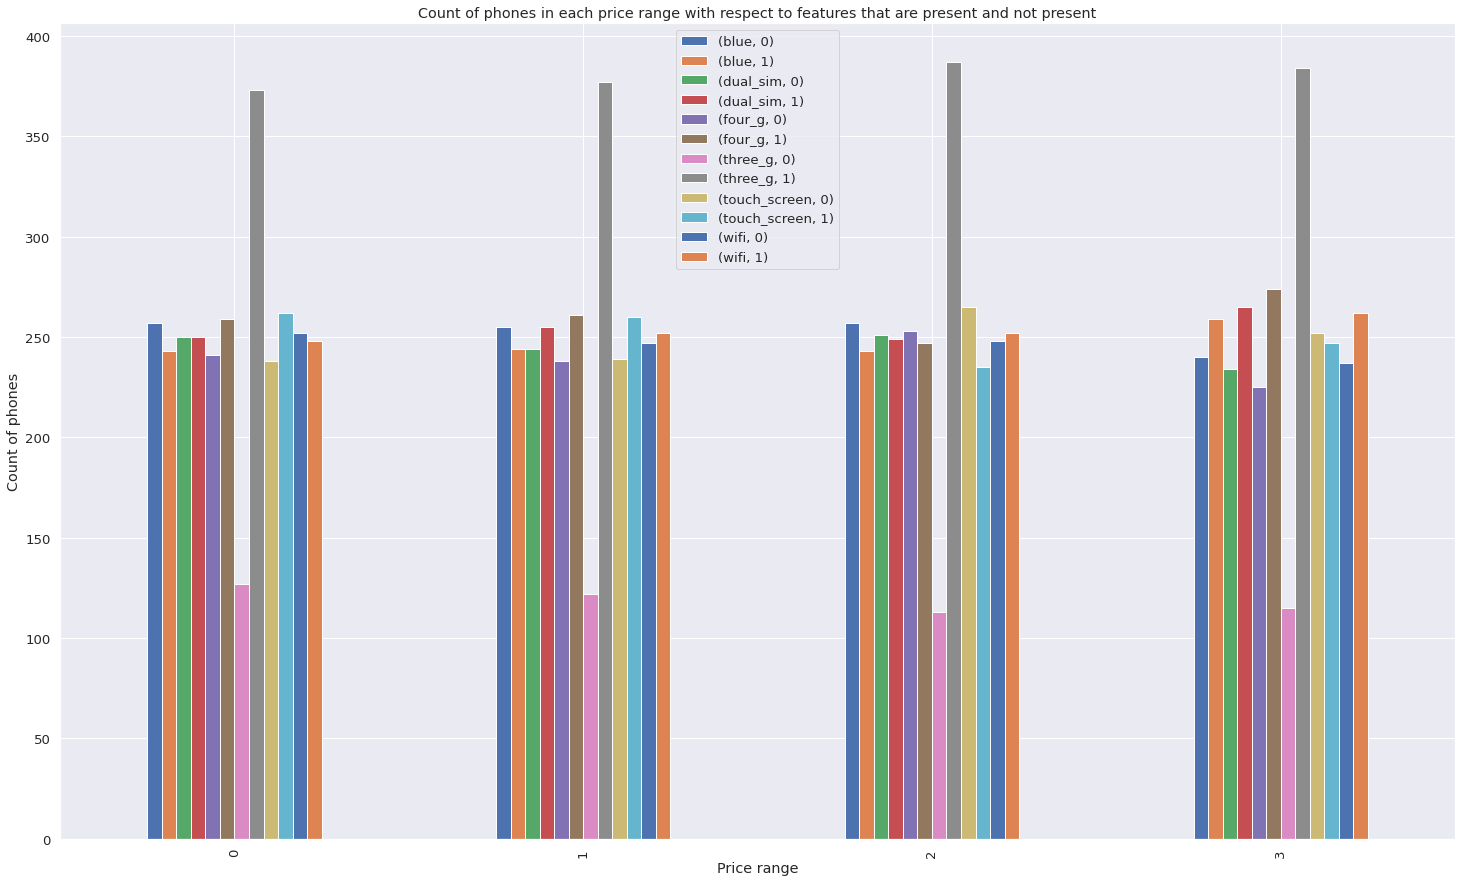

In [ ]:
# group_by_price.plot.bar(figsize=(25,15))
# plt.title('Count of phones in each price range with respect to features that are present and not present')
# plt.xlabel('Price range')
# plt.ylabel('Count of phones')
# plt.legend(loc='upper center')

In [33]:
independent_variables = df.columns.tolist()
independent_variables.remove('price_range')
# independent_variables.remove('Date')


dependent_variable = ['price_range']
print(independent_variables)
print(dependent_variable)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
['price_range']


In [34]:
X=df[independent_variables]
y=df[dependent_variable]

In [35]:
len(independent_variables)

20

In [36]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1498, 20)
(500, 20)
(1498, 1)
(500, 1)


In [37]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [38]:
X_train_scaled

array([[ 0.48153645, -0.97494658,  0.81014951, ...,  0.56347333,
         1.0026738 , -1.01479569],
       [-0.71269622, -0.97494658, -0.78090046, ...,  0.56347333,
         1.0026738 , -1.01479569],
       [-0.05176593, -0.97494658,  1.66686872, ...,  0.56347333,
        -0.99733333, -1.01479569],
       ...,
       [ 1.1310714 ,  1.02569722,  0.68776105, ..., -1.77470687,
        -0.99733333, -1.01479569],
       [-0.09051012, -0.97494658,  1.05492642, ...,  0.56347333,
         1.0026738 ,  0.98542003],
       [-1.19585906, -0.97494658, -1.2704543 , ...,  0.56347333,
        -0.99733333,  0.98542003]])

In [39]:
X_test_scaled

array([[ 0.50888529,  1.02569722, -1.2704543 , ...,  0.56347333,
         1.0026738 , -1.01479569],
       [-1.6402777 , -0.97494658, -1.02567738, ...,  0.56347333,
        -0.99733333,  0.98542003],
       [-0.4483241 , -0.97494658,  1.29970334, ...,  0.56347333,
        -0.99733333, -1.01479569],
       ...,
       [ 0.16474572,  1.02569722,  0.68776105, ...,  0.56347333,
         1.0026738 ,  0.98542003],
       [ 0.0143271 , -0.97494658, -1.2704543 , ...,  0.56347333,
         1.0026738 ,  0.98542003],
       [-0.54176597,  1.02569722,  0.93253796, ..., -1.77470687,
        -0.99733333,  0.98542003]])

In [40]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier()

In [41]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [43]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [44]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.836

In [45]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[117,  11,   0,   0],
       [  8,  89,  11,   0],
       [  0,  15, 100,  18],
       [  0,   0,  19, 112]])

In [46]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

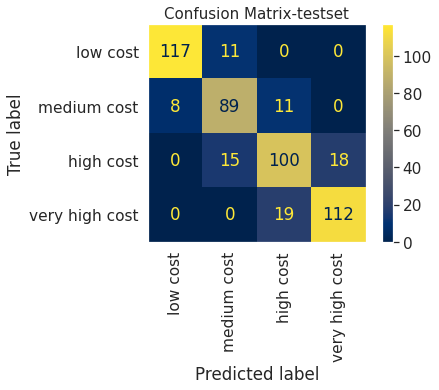

In [47]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='cividis',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [48]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       372
         1.0       1.00      1.00      1.00       391
         2.0       1.00      1.00      1.00       367
         3.0       1.00      1.00      1.00       368

    accuracy                           1.00      1498
   macro avg       1.00      1.00      1.00      1498
weighted avg       1.00      1.00      1.00      1498



In [49]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       128
         1.0       0.77      0.82      0.80       108
         2.0       0.77      0.75      0.76       133
         3.0       0.86      0.85      0.86       131

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [ ]:
# Train set accuracy is 100% and test accuracy is 84%.
# Model is overfitting on train set and is not generalised well.
# We will tune hyperparamters to reduce overfitting to imporve the model performance.

In [50]:
dtc_hp=DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20,
                       random_state=0)
dtc_hp.fit(X_train,y_train)

y_train_pred=dtc_hp.predict(X_train)
y_pred=dtc_hp.predict(X_test)


print(accuracy_score(y_train,y_train_pred))


print(accuracy_score(y_test,y_pred))

0.9259012016021362
0.852


In [51]:

cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,  15,   0,   0],
       [  7,  92,   9,   0],
       [  0,  11, 110,  12],
       [  0,   0,  20, 111]])

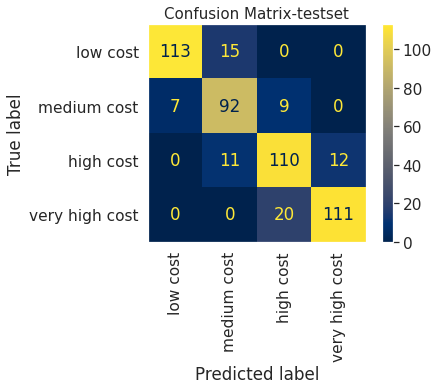

In [52]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_hp,X_test,y_test,cmap='cividis',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [53]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       372
         1.0       0.91      0.89      0.90       391
         2.0       0.89      0.90      0.89       367
         3.0       0.95      0.95      0.95       368

    accuracy                           0.93      1498
   macro avg       0.93      0.93      0.93      1498
weighted avg       0.93      0.93      0.93      1498



In [54]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       128
         1.0       0.78      0.85      0.81       108
         2.0       0.79      0.83      0.81       133
         3.0       0.90      0.85      0.87       131

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500



In [55]:
knn=KNeighborsClassifier()    
knn.fit(X_train_scaled,y_train)   

KNeighborsClassifier()

In [56]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [57]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7022696929238985

In [58]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.494

In [59]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[79, 43,  6,  0],
       [41, 46, 18,  3],
       [18, 46, 56, 13],
       [ 0, 16, 49, 66]])

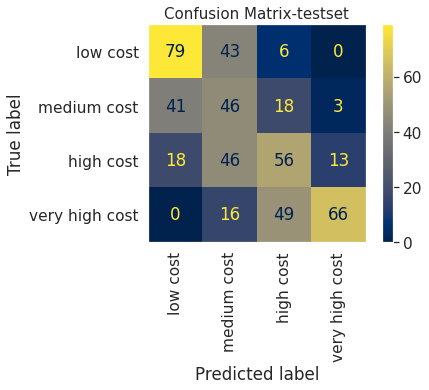

In [60]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn,X_test_scaled,y_test,cmap='cividis',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [61]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       128
         1.0       0.30      0.43      0.36       108
         2.0       0.43      0.42      0.43       133
         3.0       0.80      0.50      0.62       131

    accuracy                           0.49       500
   macro avg       0.53      0.49      0.50       500
weighted avg       0.54      0.49      0.50       500



In [62]:

knn_optimal=KNeighborsClassifier(n_neighbors=50)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=50)

In [63]:
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [64]:
accuracy_score(y_train,y_train_pred)

0.6815754339118825

In [65]:
accuracy_score(y_test,y_pred)

0.632

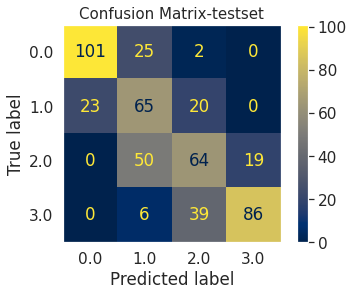

In [91]:
plot_confusion_matrix(knn_optimal,X_test_scaled,y_test,cmap='cividis')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       128
         1.0       0.45      0.60      0.51       108
         2.0       0.51      0.48      0.50       133
         3.0       0.82      0.66      0.73       131

    accuracy                           0.63       500
   macro avg       0.65      0.63      0.63       500
weighted avg       0.66      0.63      0.64       500



In [108]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')

In [101]:
# Defining a function to standardize and then perform fit and transform print the test and train accuracy.
# plot confusion matrix,roc,auc plots
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    cf_matrix=confusion_matrix(y_test,y_pred)
    Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

    print(f'Train set accuracy score is {accuracy_score(y_train,y_train_pred)}')
    print(f'Test set accuracy score is {accuracy_score(y_test,y_test_pred)}')
    print('')
    # print(f'The confusion matrix is \n{cf_matrix}')
    # print('')
    # print()
    # print(classification_report(y_train,y_train_pred))
    # print(classification_report(y_test,y_test_pred))
    plot_confusion_matrix(ml_model,X_test,y_test,cmap='cividis')
    plt.grid(False)
    plt.title('Confusion Matrix-testset',fontsize=15)
    plt.show()

    pred_prob = ml_model.predict_proba(X_test)
    plot_Auc_roc(y_test,pred_prob)

    

Train set accuracy score is 1.0
Test set accuracy score is 0.812



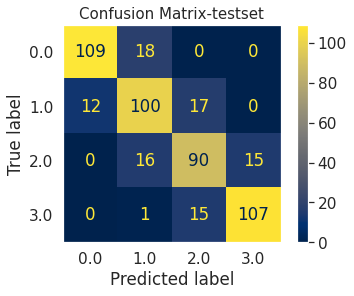

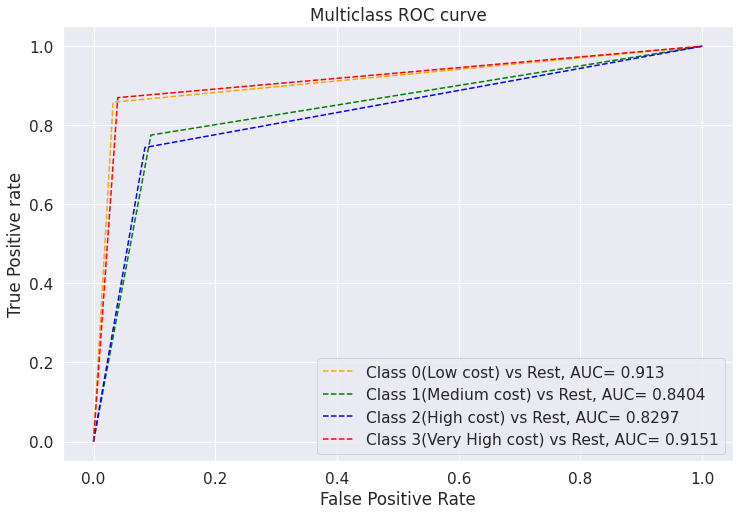

In [121]:
predict(DecisionTreeClassifier(),X,y)

Train set accuracy score is 1.0
Test set accuracy score is 0.894



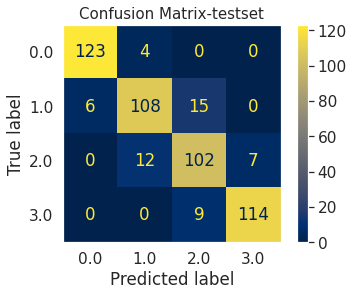

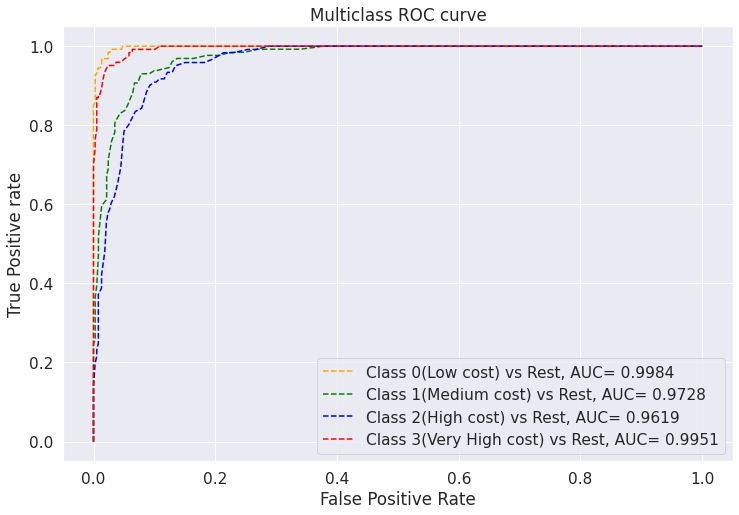

In [122]:
predict(RandomForestClassifier(),X,y)

Train set accuracy score is 0.9993324432576769
Test set accuracy score is 0.916



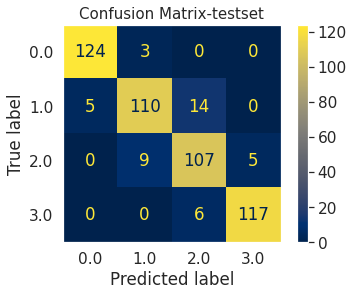

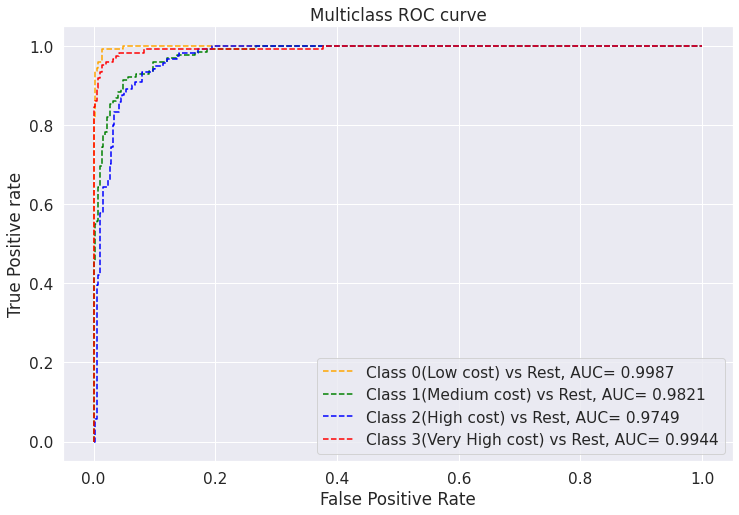

In [113]:
predict(GradientBoostingClassifier(),X,y)

Train set accuracy score is 0.6822429906542056
Test set accuracy score is 0.532



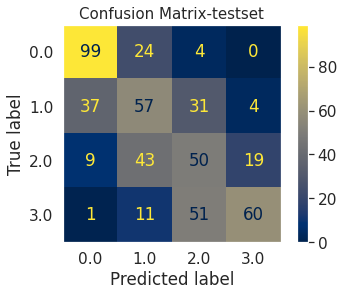

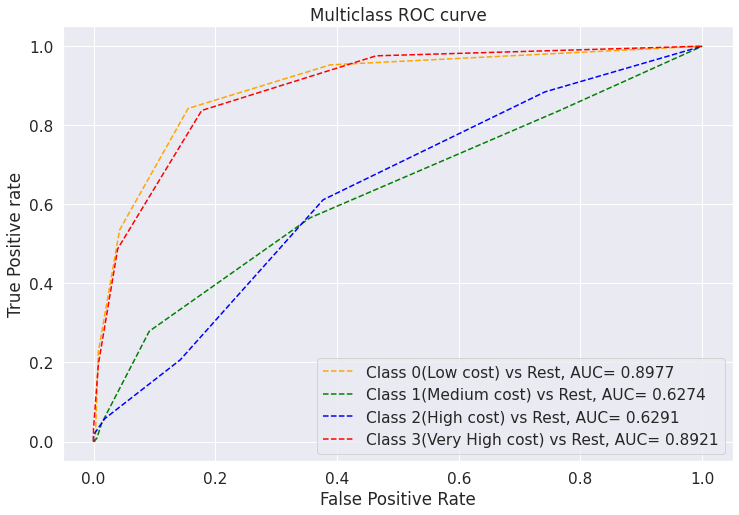

In [114]:
predict(KNeighborsClassifier(),X,y)

In [116]:
from sklearn.svm import SVC

Train set accuracy score is 0.9893190921228304
Test set accuracy score is 0.898



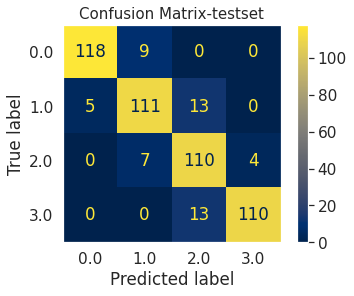

AttributeError: ignored

In [119]:
predict(SVC(),X,y)

Train set accuracy score is 0.9853137516688919
Test set accuracy score is 0.904



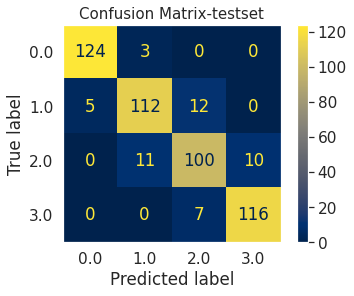

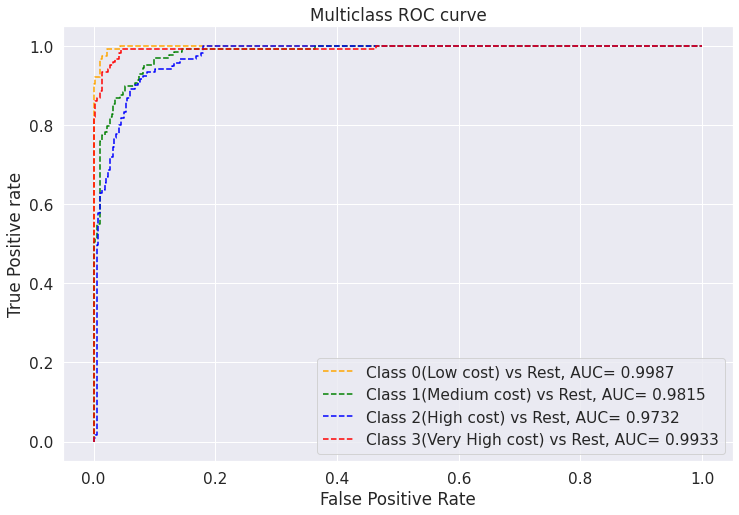

In [120]:
predict(XGBClassifier(),X,y)